In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from util.helpers import id2label, labels


In [107]:
df = pd.read_csv('../../dataset/LDA_Arguments.csv')
df

,actor,text,label
0,Abelia,Abelias omstillingsbarometer 2023 viser at Nor...,0
1,Advokatforeningen,77 L (2016-2017) s. 6). Loven inneholder samti...,0
2,Advokatforeningen,Det same gjer fleire klimatiltak. Dersom natur...,0
3,Advokatforeningen,de 31 årene fra 1990 til 2021 ble redusert med...,0
4,Advokatforeningen,Dette handler om å holde det politiske systeme...,0
...,...,...,...
1035,ZERO,Det er viktig at biodrivstoff flyttes over fra...,5
1036,ZERO,Både Finland og Tyskland har slike krav på pla...,5
1037,ZERO,Utvalget viser til at et slikt forbud er utred...,5
1038,ZERO,Hvilke utslippskutt krever hvilken mengde ener...,5


In [108]:
df["label"].unique()

array([0, 2, 1, 4, 5, 3, 6], dtype=int64)

In [109]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [110]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))
y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

labels = labels()



print(classification_report(y_test, y_pred, target_names=labels))


0.34615384615384615
                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         2
 Offentlig forvaltning       0.00      0.00      0.00        40
               Bedrift       0.00      0.00      0.00        11
          Privatperson       0.33      1.00      0.49        64
        Politisk parti       0.89      0.12      0.22        64
Frivillig organisasjon       0.00      0.00      0.00         5
 Akademisk institusjon       0.00      0.00      0.00        22

              accuracy                           0.35       208
             macro avg       0.17      0.16      0.10       208
          weighted avg       0.37      0.35      0.22       208



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

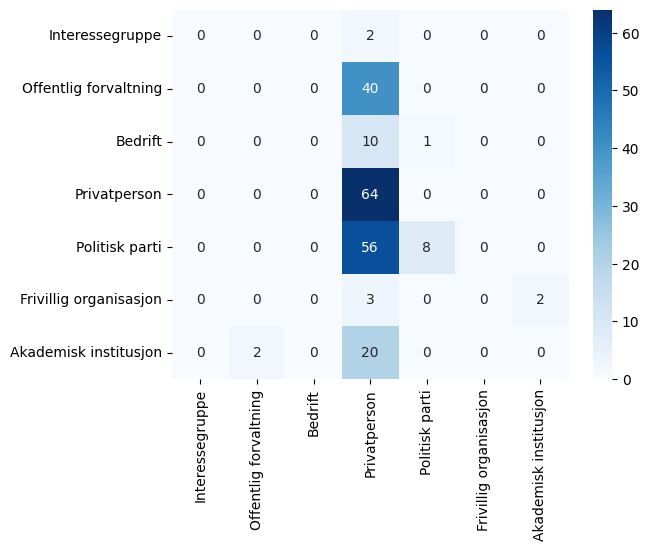

In [112]:

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

### Countvectorizer

0.5240384615384616
                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         2
 Offentlig forvaltning       0.45      0.12      0.20        40
               Bedrift       0.50      0.09      0.15        11
          Privatperson       0.44      0.91      0.59        64
        Politisk parti       0.71      0.58      0.64        64
Frivillig organisasjon       1.00      0.20      0.33         5
 Akademisk institusjon       0.70      0.32      0.44        22

              accuracy                           0.52       208
             macro avg       0.54      0.32      0.34       208
          weighted avg       0.57      0.52      0.48       208



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

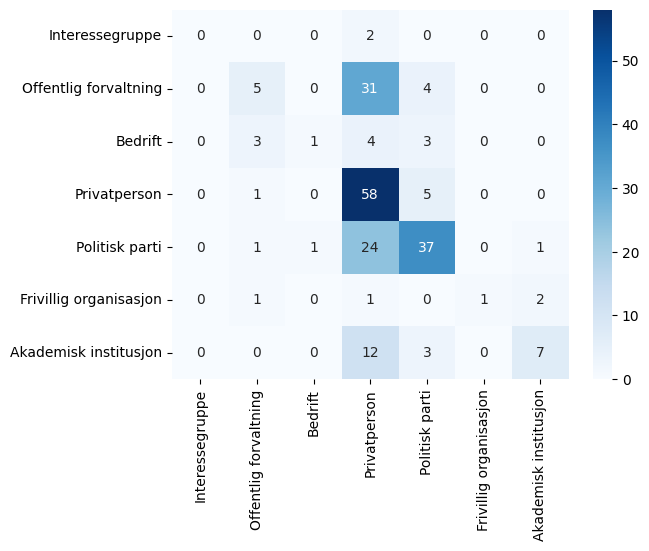

In [113]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

# Convert ids to labels
y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

print(classification_report(y_test, y_pred, target_names=labels))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

## Binary classifier MNB

## MNB binary classifier with count vectorizer

In [114]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

[1 2 0 0 2 1 1 0 2 2 1 1 1 3 1 0 0 0 3 0 0 0 0 0 1 1 1 2 2 4 0 3 0 1 1 4 0
 0 6 0 3 5 2 2 3 5 2 1 2 2 1 0 5 2 0 2 4 1 1 3 0 2 0 1 5 0 1 0 3 2 0 1 5 0
 2 3 1 1 0 5 5 0 0 0 1 3 0 2 0 5 1 0 0 3 0 1 0 0 2 1 1 5 1 0 4 2 1 3 0 2 3
 0 1 0 1 0 2 0 1 0 2 1 0 2 2 0 0 0 0 0 2 0 4 1 0 0 0 0 0 2 0 1 0 0 2 2 0 2
 2 4 0 5 1 2 0 2 2 1 1 1 2 5 0 1 0 0 2 1 0 0 5 0 1 5 0 0 2 0 5 0 1 1 0 1 0
 4 1 4 5 0 5 6 0 1 1 1 1 1 1 5 1 5 1 0 1 0 5 2 1 4 0 2 2 0 0 1 5 0 2 0 4 4
 0 0 0 2 5 2 0 1 0 2 3 0 2 0 5 5 2 2 0 1 0 3 3 0 1 0 0 4 1 1 2 5 0 2 3 1 1
 2 0 0 2 0 3 1 0 0 2 1 1 0 0 0 0 2 0 0 2 1 0 1 3 1 3 0 5 2 4 0 1 1 2 3 0 6
 6 0 0 5 2 0 2 3 2 3 0 0 3 0 1 0 5 2 3 0 3 0 1 1 0 2 0 0 0 0 0 2 0 1 0 2 0
 2 3 3 2 0 0 1 5 0 0 3 0 2 5 0 0 2 2 1 6 1 1 1 1 0 5 3 3 1 1 2 5 1 1 0 1 1
 5 0 3 1 0 6 2 5 3 5 0 1 0 0 1 1 0 1 0 3 1 1 1 3 1 1 1 2 2 1 2 5 2 1 0 1 0
 2 0 0 3 1 0 1 2 1 0 0 3 0 6 2 1 0 0 1 2 1 2 1 0 1 0 5 1 3 0 5 0 3 3 0 1 1
 1 2 5 1 0 0 1 0 0 2 2 4 0 0 0 0 1 0 1 0 5 0 2 0 0 2 2 1 0 1 1 0 3 5 1 0 5
 3 2 1 1 0 2 0 3 5 6 0 2 

In [115]:
# Try with a binary classifier
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [116]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.9278846153846154


<Axes: >

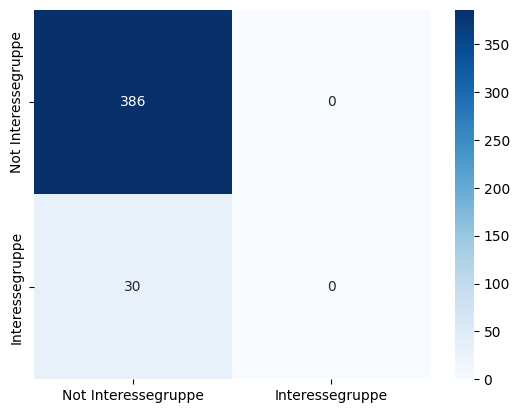

In [117]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interessegruppe', 'Interessegruppe'], yticklabels=['Not Interessegruppe', 'Interessegruppe'])


### Binary classifer with CountVectorizer


In [118]:
# Try with a binary classifier
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 3, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [119]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.8720183062130178


<Axes: >

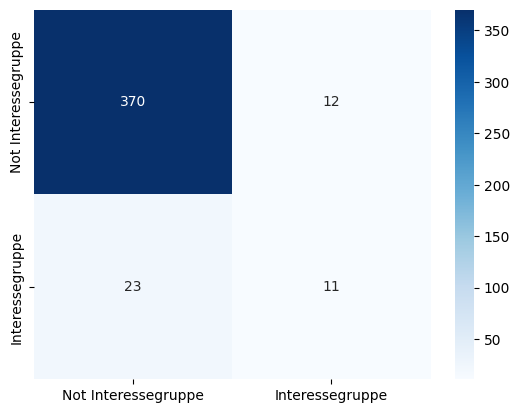

In [120]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interessegruppe', 'Interessegruppe'], yticklabels=['Not Interessegruppe', 'Interessegruppe'])